In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import pickle
from sklearn.metrics import *
import pandas as pd
import seaborn as sns
import statsmodels

In [2]:
from all_models import *
#from transfer_models import *

In [3]:
# read fit values
#fits_single = pickle.load(open('fit_single_CV_704.pickle', 'rb'))
#fits_dual = pickle.load(open('fit_dual_CV_704.pickle', 'rb'))
#fits_avg = pickle.load(open('fit_dual_fastavg_CV_704.pickle', 'rb'))
#fits_eight = pickle.load(open('fit_dual_eight_CV_704.pickle', 'rb'))
#fits_alpha = pickle.load(open('fit_dual_2alpha_CV_704.pickle', 'rb'))
#fits_six = pickle.load(open('fit_six_CV_704.pickle', 'rb'))
#fits_mixed = pickle.load(open('fit_mixed_CV_704.pickle', 'rb'))
fits_single = pickle.load(open('fit_single_CV_640.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_CV_640.pickle', 'rb'))
fits_hybrid = pickle.load(open('fit_hybrid_CV_704.pickle', 'rb'))
#fits_single_transfer = pickle.load(open('fit_single_CV_transfer.pickle', 'rb'))
#fits_dual_transfer = pickle.load(open('fit_dual_CV_transfer.pickle', 'rb'))

curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))
curvatures_smooth = curvatures_smooth/90
curvatures = pickle.load(open('curvatures.pickle', 'rb'))

In [43]:
#fits_dual_nocv = pickle.load(open('dual_gridsearch_fits.pickle', 'rb'))
#fits_single_nocv = pickle.load(open('fit_single_640_starting_point.pickle', 'rb'))
fits = pickle.load(open('fit_nocv_640.pickle', 'rb'))
fits_dual_cv = pickle.load(open('fit_dual_CV_640_bestfit_starting_point.pickle', 'rb'))
fits_single_cv = pickle.load(open('fit_single_CV_640_bestfit_starting_point.pickle', 'rb'))



-360.60590753096716

In [44]:
fits_single_nocv = np.vstack(fits[:, 0])
fits_dual_nocv = np.vstack(fits[:, 1])

In [46]:
fits_single_nocv[25, -1]

-1265.3754745573249

In [47]:
#for participant in range(60):
#    if fits_dual_nocv[participant, -1] > fits_single_nocv[participant, -1]:
#        fits_dual_nocv[participant, -1] = fits_single_nocv[participant, -1]
lr = (fits_single_nocv[:, -1]-fits_dual_nocv[:, -1])

In [48]:
p = 5
print(fits_dual_nocv[p][-1], fits_single_nocv[p][-1])
print(fits_dual_cv[0][p][-3], fits_single_cv[0][p][-3])

649.7171558469461 649.2274768361743
574.551207629837 469.34065234290404


In [45]:
np.where(fits_single_nocv[:, -1] == fits_dual_nocv[:, -1])[0]

array([], dtype=int64)

In [20]:
fits_single_nocv[np.where(fits_single_nocv[:, -1] == fits_dual_nocv[:, -1])[0][13]]

array([ 9.99999998e-01,  1.58984123e-03, -1.21998753e+02,  2.19968835e-01])

In [49]:
AIC_single = fits_single_nocv[:, -1] + 6
AIC_dual = fits_dual_nocv[:, -1] + 10

BIC_single = fits_single_nocv[:, -1] + 3*np.log(640)
BIC_dual = fits_dual_nocv[:, -1] + 5*np.log(640)

In [50]:
p_val = stat.chi2.sf(lr, 2)

In [51]:
sum(BIC_dual < BIC_single)

4

In [52]:
sum(AIC_dual < AIC_single)

7

In [53]:
chisq = np.repeat('single_selected', 64)
chisq[p_val < 0.05] = 'dual_selected'
aic = np.repeat('single_selected', 64)
aic[np.where(AIC_dual < AIC_single)[0]] = 'dual_selected'
bic = np.repeat('single_selected', 64)
bic[np.where(BIC_dual < BIC_single)[0]] = 'dual_selected'



In [60]:
np.where(AIC_dual < AIC_single)

(array([ 8, 18, 24, 40, 44, 50, 56]),)

In [304]:
#curvatures_smooth = pickle.load(open('avg_smooth.pickle', 'rb'))
#curvatures_smooth = curvatures_smooth/90

In [55]:
model_comparison_df = pd.DataFrame({'participant_id': np.arange(64),
                                    'rotation': np.tile(['Sudden', 'Gradual'], 32),
                                    'emphasis': np.repeat(['Accuracy', 'Speed'], 32),
                                    'AIC': aic,
                                    'BIC': bic,
                                    'Chisq': chisq,
                                    'A': fits_single_nocv[:, 0], 
                                    'B': fits_single_nocv[:, 1],
                                    'Af': fits_dual_nocv[:, 0],
                                    'Bf': fits_dual_nocv[:, 1],
                                    'As': fits_dual_nocv[:, 2],
                                    'Bs': fits_dual_nocv[:, 3],
                                   })

In [56]:
model_param = pd.melt(model_comparison_df, id_vars=['participant_id', 'rotation', 'emphasis', 'AIC', 'BIC', 'Chisq'], 
                           value_vars=['A', 'B', 'Af', 'Bf', 'As', 'Bs'], 
                           value_name="param_value", var_name = "param")

In [57]:
model_param['condition'] = model_param['rotation'] + ' ' + model_param['emphasis']

In [58]:
model_param_dual_selected = model_param.query("AIC == 'dual_selected'")

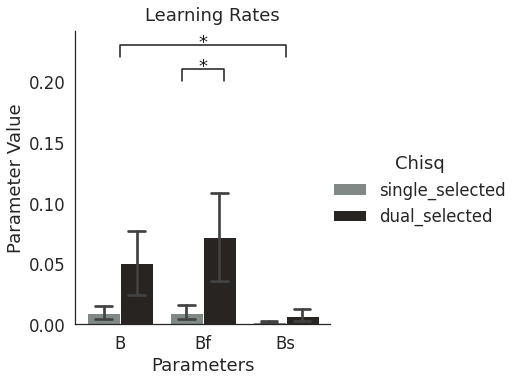

In [64]:
sns.set(font_scale = 1.5)
sns.set_style('white')

colors = ['#808A87', '#292421', '#808A87', '#292421']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(x = 'param',  y = 'param_value', 
                hue = 'Chisq',
                data = model_param.query("param == 'B' or param == 'Bs' or param == 'Bf'"), 
                capsize = 0.2, kind = 'bar')
#hatches = ['//', '', '//', '', '//', '', '//', '', '//', '', '//', '']
#num_locations = len(model_param.rotation.unique())
#for i, patch in enumerate(g.ax.patches):
#    patch.set_hatch(hatches[i])

#sns.catplot(x = "param", y = "param_value", hue = 'rotation', row = 'AIC',  
#            data = model_param.query("param == 'Af' or param == 'A' or param == 'As'"), 
#            kind = 'bar', capsize = 0.3)
#x1, x2 = 0, 1
#y, h, col = 0.25, 0.01, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h-0.005, "*", ha='center', va='bottom', color=col)

x1, x2 = 0, 2
y, h, col = 0.2, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y+0.02, y+h+0.02, y+h+0.02, y+0.02], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.015, "*", ha='center', va='bottom', color=col)

x1, x2 = 0.75, 1.25
y, h, col = 0.2, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h-0.005, "*", ha='center', va='bottom', color=col)


plt.ylabel('Parameter Value')
plt.text(0.3, y+h+0.09-0.05, 'Learning Rates')
plt.xlabel('Parameters')

#
plt.savefig('learning_rates.png', dpi = 600, bbox_inches = 'tight')

In [88]:
model = smf.ols('param_value ~ BIC*param', data = model_param.query(" param == 'B' or param == 'Bf'")).fit()
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
BIC,1.0,0.029605,0.029605,63.386943,9.236905e-13
param,1.0,0.000043,0.000043,0.092965,7.609527e-01
BIC:param,1.0,0.001423,0.001423,3.046246,8.340114e-02
Residual,124.0,0.057914,0.000467,NaN,NaN


In [299]:
stat.ttest_ind(model_param_dual_selected[model_param_dual_selected.param == 'B']['param_value'], model_param_dual_selected[model_param_dual_selected.param == 'Bf']['param_value'])

Ttest_indResult(statistic=-3.1984803783910563, pvalue=0.002274498910513359)

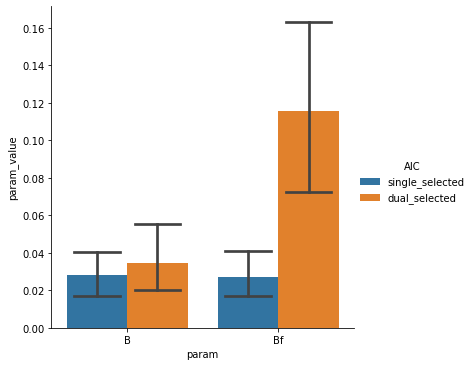

In [118]:
sns.catplot(x = "param", y = "param_value", hue = 'AIC', data = model_param.query("param == 'B' or param == 'Bf'"), kind = 'bar', capsize = 0.3)

In [33]:
model = smf.ols('param_value ~ AIC*param', data = model_param.query("param == 'As' or param == 'A' or param == 'Af'")).fit()
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
AIC,1.0,0.463251,0.463251,9.838970,2.006567e-03
param,2.0,4.940979,2.470490,52.470623,1.472911e-18
AIC:param,2.0,0.335405,0.167703,3.561827,3.047506e-02
Residual,174.0,8.192493,0.047083,NaN,NaN


In [39]:
corr = model_comparison_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

In [324]:
stats.ttest_ind(model_comparison_df[model_comparison_df['BIC'] == 'dual_selected']['Bf'], model_comparison_df[model_comparison_df['BIC'] == 'single_selected']['Bf'])

Ttest_indResult(statistic=4.380939211533341, pvalue=5.0187161561609644e-05)

In [61]:
single_model_errors = np.zeros((60, 704))
dual_model_errors = np.zeros((60, 704))

single_r_est = np.zeros((60, 704))
dual_r_est = np.zeros((60, 704))

fast_est = np.zeros((60, 704))
slow_est = np.zeros((60, 704))

for participant in range(60):
    if participant%4 == 0 or participant%4 == 1:
        single_model_errors[participant], single_r_est[participant] = model_sudden(704, fits_single_nocv[participant][0], fits_single_nocv[participant][1])
        dual_model_errors[participant], dual_r_est[participant], fast_est[participant], slow_est[participant] = dual_model_sudden(704, fits_dual_nocv[participant][0], fits_dual_nocv[participant][1], fits_dual_nocv[participant][3], fits_dual_nocv[participant][4])
        
    else:
        single_model_errors[participant], single_r_est[participant] = model_gradual(704, fits_single_nocv[participant][0], fits_single_nocv[participant][1])
        dual_model_errors[participant], dual_r_est[participant], fast_est[participant], slow_est[participant] = dual_model_gradual(704, fits_dual_nocv[participant][0], fits_dual_nocv[participant][1], fits_dual_nocv[participant][3], fits_dual_nocv[participant][4])


In [62]:
dual_selected_fast_est = fast_est[np.unique(model_param.query("AIC == 'dual_selected'")['participant_id'])]
dual_selected_slow_est = slow_est[np.unique(model_param.query("AIC == 'dual_selected'")['participant_id'])]

dual_selected_single_error = single_model_errors[np.unique(model_param.query("AIC == 'dual_selected'")['participant_id'])]
dual_selected_dual_error = dual_model_errors[np.unique(model_param.query("AIC == 'dual_selected'")['participant_id'])]

dual_selected_single_r_est = single_r_est[np.unique(model_param.query("AIC == 'dual_selected'")['participant_id'])]
dual_selected_dual_r_est = dual_r_est[np.unique(model_param.query("AIC == 'dual_selected'")['participant_id'])]


In [63]:
curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))/90

array([ 1,  3,  4,  5,  7,  8,  9, 13, 15, 16, 17, 20, 21, 25, 31, 32, 33,
       35, 37, 39, 41, 43, 47, 49, 52, 53, 56, 57, 59])

In [70]:
dual_participants = np.unique(model_param.query("AIC == 'dual_selected'")['participant_id'])

In [73]:
curvatures_dual_participants = curvatures_smooth[dual_participants]

In [91]:
dual_participants_rotation = np.zeros(len(dual_participants), dtype = object)
dual_participants_emphasis = np.zeros(len(dual_participants), dtype = object)

for i in range(len(dual_participants)):
    if dual_participants[i]%4 == 0 or dual_participants[i]%4 == 1:
        dual_participants_rotation[i] = 'Sudden'
    else:
        dual_participants_rotation[i] = 'Gradual'
        
    if dual_participants[i]%2 == 0:
        dual_participants_emphasis[i] = 'Speed'
    else:
        dual_participants_emphasis[i] = 'Accuracy'
        
            

In [76]:
dual_washout_pred_dual_select = dual_selected_dual_error[:, 640:]
single_washout_pred_dual_select = dual_selected_single_error[:, 640:]
washout_errors_dual_select = curvatures_dual_participants[:, -1]

In [83]:
corr_mat = np.zeros((29, 2))
p_val_mat = np.zeros((29, 2))

In [84]:
for participant in range(29):
    corr_mat[participant][0], p_val_mat[participant][0] = stats.pearsonr(dual_washout_pred_dual_select[participant], washout_errors_dual_select[participant])
    corr_mat[participant][1], p_val_mat[participant][1] = stats.pearsonr(single_washout_pred_dual_select[participant], washout_errors_dual_select[participant])
    

In [95]:
corr_mat

array([[ 0.42123804,  0.86736272],
       [ 0.67563921,  0.88917118],
       [ 0.87433862,  0.91950939],
       [ 0.68837901,  0.61290871],
       [ 0.77204849,  0.93309761],
       [-0.08669244,  0.4665874 ],
       [ 0.50154523,  0.0289104 ],
       [ 0.61112142,  0.82108807],
       [ 0.18404922,  0.66107499],
       [ 0.56036881,  0.33704815],
       [ 0.84653289,  0.78696542],
       [ 0.27572418,  0.79486647],
       [ 0.4091289 ,  0.81931078],
       [ 0.94681681,  0.84394352],
       [ 0.90597854,  0.86751655],
       [ 0.45340783,  0.33264223],
       [ 0.73231298,  0.8699032 ],
       [ 0.3557935 ,  0.76612368],
       [ 0.84279981,  0.6335881 ],
       [ 0.84532225,  0.91061533],
       [ 0.93884453,  0.96014172],
       [ 0.86436434,  0.69666083],
       [ 0.68713172,  0.70467519],
       [ 0.86140496,  0.5393333 ],
       [ 0.00363447,  0.19585738],
       [ 0.67238696,  0.82518242],
       [ 0.43151884,  0.85111566],
       [ 0.9234529 ,  0.49600187],
       [-0.05026045,

In [98]:
washout_pred_df = pd.DataFrame({'participant_id': np.repeat(dual_participants, 2),
                                'rotation': np.repeat(dual_participants_rotation, 2),
                                'emphasis': np.repeat(dual_participants_emphasis, 2),
                                'corr_label': np.tile(['dual_corr_washout', 'single_corr_washout'], len(dual_participants)),
                                'correlations': np.ravel(corr_mat),
                               })
washout_pred_df['condition'] = washout_pred_df['rotation'] + '_' + washout_pred_df['emphasis']

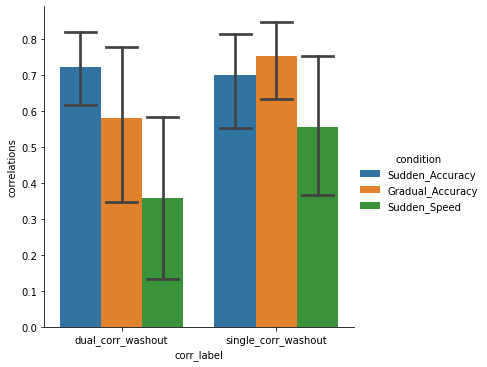

In [101]:
sns.catplot(x = 'corr_label', y = 'correlations', hue = 'condition', data = washout_pred_df, kind='bar', capsize = 0.2)